# Overview of the Assignments

In this assignment you will perform following listed tasks for more detail please read all the documents:

• **design, build, train and implement Fully Connected Neural Network for Image Classification
task.**

• **design, build, train and implement Convolutional Neural Network for Image Classification task.**

• **Transfer - Learning: fine-tune a pre-trained model and observe the performance.**

## 1.1. Setting Up Your Environment

We highly recommend the use of Google Colab or in option you may also use Jupyter Notebook
with Anaconda or any other Notebook like environment.
Cautions: Task may require the use of GPU processing, Colab provides some limited GPU
acess use wisely.

## 1.2 About Dataset**

Please feel free to pick any datasets in image format that matches the task requirements. But please
take pre-approval from your respected instructor and or Module leader.
If you are not sure about which dataset to pick, select one from the options provided.
Note: No two groups in one Section can have same datasets.

**Dataset was found via Kaggle and kaggle commands were used to import the datasets.**

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:06<00:00, 201MB/s]
100% 1.06G/1.06G [00:06<00:00, 172MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**The zipped dataset folder was unzipped using the aforementioend code**

Now, necessary imports were imported for the tasks

# 2 Tasks - Image Classification. [40]

## 2.1 Task1: Data Understanding [5]

In this task, we expect you to collect the data, understand the data about and perform following
activities:
1. **Data Analysis: In this section you must try to answer following questions.**

• How many total images are in the dataset?

• How balanced is your dataset?i.e. image per class or label

• How is your data distributed among train, valid and test set? If not How will you split the
dataset among aforementioned folder.

In [ ]:
# Importing necessary libraries for deep learning tasks
import tensorflow as tf  # TensorFlow library for building and training deep learning models
from tensorflow import keras  # Keras API for building neural networks
from keras import Sequential  # Sequential model for stacking layers sequentially
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout  # Various layers for constructing the neural network
from keras.preprocessing.image import load_img  # Function for loading images
import warnings  # Library for handling warnings
warnings.filterwarnings("ignore")  # Ignore warnings to prevent cluttering the output
import os  # Library for interacting with the operating system
import random  # Library for generating random numbers
import matplotlib.image as mpimg  # Library for reading and displaying images
from keras.applications.vgg16 import VGG16  # Pre-trained VGG16 model for transfer learning
from keras.utils import plot_model  # Function for plotting model architectures
from keras.preprocessing.image import ImageDataGenerator  # Image data generator for data augmentation
from keras.preprocessing import image  # Module for preprocessing input images
from keras.layers import BatchNormalization  # Layer for normalizing activations
from keras.regularizers import l2  # Regularization technique for preventing overfitting
import matplotlib.pyplot as plt  # Library for creating plots and visualizations
import numpy as np  # Library for numerical computing
from PIL import Image  # Python Imaging Library for handling images
from keras.regularizers import l2  # Regularization technique for preventing overfitting
import numpy as np  # Library for numerical computing
from sklearn.metrics import confusion_matrix  # Function for computing confusion matrix
# from keras.metrics import AUC  # Metric for area under the curve (not used in this code)


Genrator used to read/generate the datasets:
**image_dataset_from_directory**

In [ ]:
# Creating a generator for the training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',   # Directory containing training images
    labels='inferred',            # Inferred labels from subdirectories
    label_mode='int',             # Labels represented as integers
    batch_size=64,                # Batch size set to 64
    image_size=(256, 256)         # Resizing images to 256x256 pixels
)

# Creating a generator for the validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',    # Directory containing validation images
    labels='inferred',            # Inferred labels from subdirectories
    label_mode='int',             # Labels represented as integers
    batch_size=64,                # Batch size set to 64
    image_size=(256, 256)         # Resizing images to 256x256 pixels
)

# Determining the length of the validation dataset
num_samples = len(validation_ds)

# Calculating the number of samples to include (50% of the dataset)
num_samples_to_pick = int(num_samples * 0.5)

# Shuffling the validation dataset for randomization
validation_ds_shuffled = validation_ds.shuffle(num_samples)

# Selecting the first 50% for the test dataset
test_ds = validation_ds_shuffled.take(num_samples_to_pick)

# Printing the classes present in the training dataset
print("Classes in train_ds:")
print(train_ds.class_names)

# Printing the classes present in the validation dataset
print("\nClasses in validation_ds:")
print(validation_ds.class_names)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Classes in train_ds:
['cats', 'dogs']

Classes in validation_ds:
['cats', 'dogs']


**The data generator used in the provided code is a TensorFlow data generator created using the image_dataset_from_directory function from the Keras utils module.**

Class counts in validation dataset:
Class Dogs: 2500 images
Class Cats: 2500 images
Total number of files in test dataset: 5000


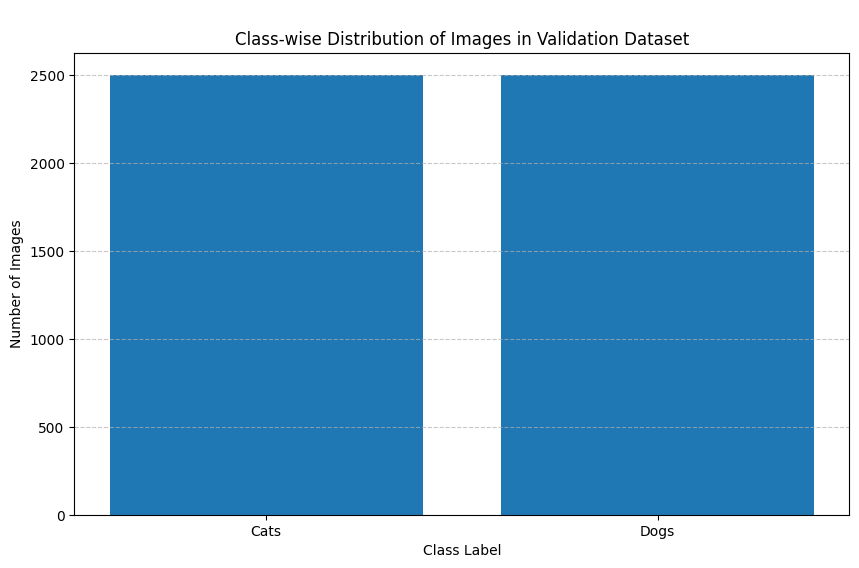

In [ ]:
# Initializing an empty dictionary to store class counts and a variable to store total count
class_counts = {}
vcount = 0

# Iterate through the validation dataset to count the occurrences of each class
for images, labels in validation_ds:
    for label in labels.numpy():
        # If label is not in dictionary, add it with count 1, else increment the count
        if label not in class_counts:
            class_counts[label] = 1
        else:
            class_counts[label] += 1

# Print the class counts
print("Class counts in validation dataset:")
for class_label, count in class_counts.items():
    # Map class labels to their names (0 for Cats, 1 for Dogs)
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    vcount += count  # Increment the total count

# Print the total number of images in the validation dataset
print("Total number of files in test dataset:", vcount)

# Plotting the class-wise distribution of images in the validation dataset
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nClass-wise Distribution of Images in Validation Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**The number of images is perfectly balanced as there are 2500 images each in Validation dataset**

Count of images for each class in the train dataset:
Class Dogs: 10000 images
Class Cats: 10000 images
Total number of images in the train dataset: 20000


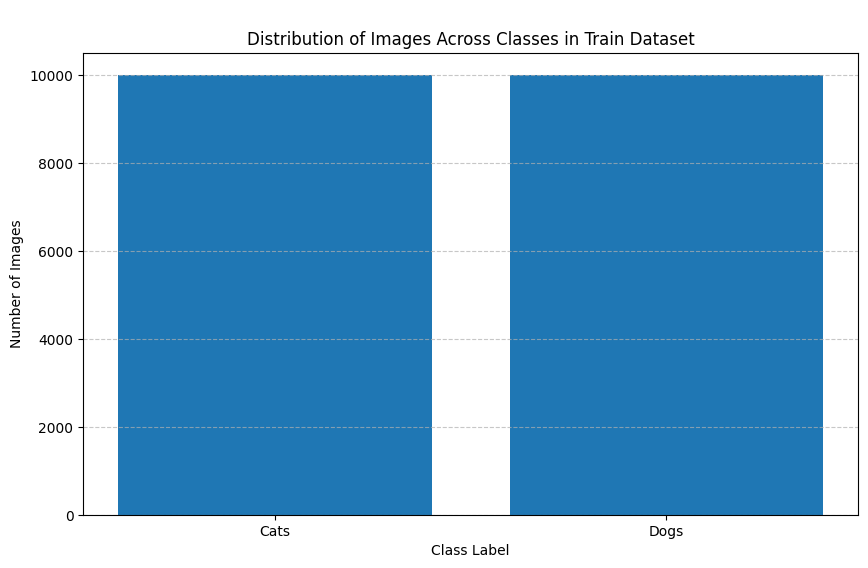

In [ ]:
# Empty dictionary to store the count of classes
class_counts = {}

# Initializing train images
total_train_images = 0

# Interation within train dataset
for images, labels in train_ds:
    # Looping within batch
    for label in labels.numpy():
        # Count of 1 if label is not in dictionary
        if label not in class_counts:
            class_counts[label] = 1
        # The labels are already present, incrementing its count
        else:
            class_counts[label] += 1

# Display the count of each class in the train dataset
print("Count of images for each class in the train dataset:")
for class_label, count in class_counts.items():
    # Map class labels to their respective names
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    # Update the total count with the count of images for each class
    total_train_images += count

# Output the total number of images in the train dataset
print("Total number of images in the train dataset:", total_train_images)

# Plot the distribution of images across classes in the train dataset
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nDistribution of Images Across Classes in Train Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**The number of images is perfectly balanced as there are 10000 images each in Train dataset**


Counts for each class in the test dataset:
Class Cats: 1219 images
Class Dogs: 1277 images
Total number of images in the test dataset: 2496


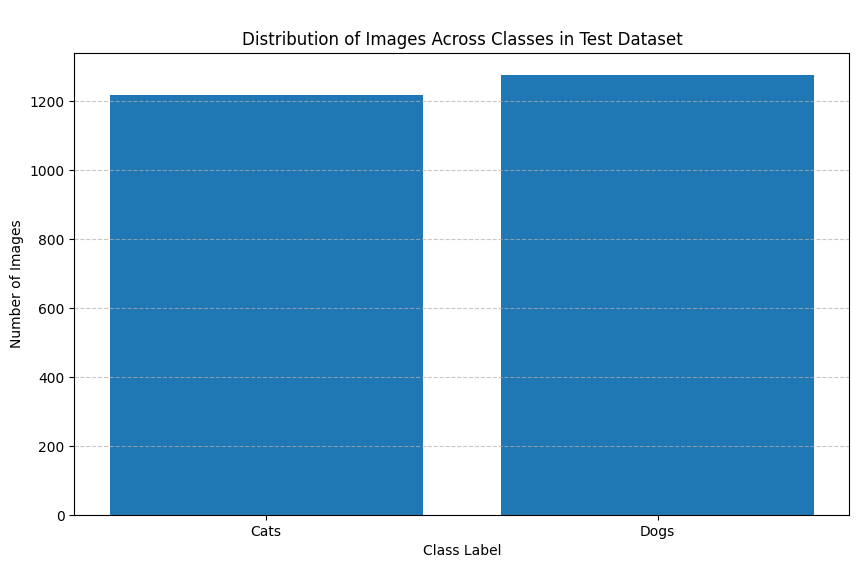

In [ ]:
# Initialize an empty dictionary to tally the count of each class in the test dataset
class_counts = {}
total_test_images = 0

# Iterate through the test dataset to count the occurrences of each class label
for images, labels in test_ds:
    for label in labels.numpy():
        # Increment the count for each class label
        if label not in class_counts:
            class_counts[label] = 1
        else:
            class_counts[label] += 1

# Display the count of each class label in the test dataset
print("Counts for each class in the test dataset:")
for class_label, count in class_counts.items():
    # Map class labels to their respective names
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    # Update the total count with the count of images for each class
    total_test_images += count

# Display the total number of images in the test dataset
print("Total number of images in the test dataset:", total_test_images)

# Plot the distribution of images across classes in the test dataset
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nDistribution of Images Across Classes in Test Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**There are 2496 images in the test dataset obtained by shuffling validation dataset and is divided into 2 classes almost equally.**

**All in all, 25000 images of cats have been divided into three folders**

# 2. Data Visualization: Following must be done in this step:

**Visualize at least one image per class.**

**There are 5 images of both dogs and cats classes from all the datasets.**

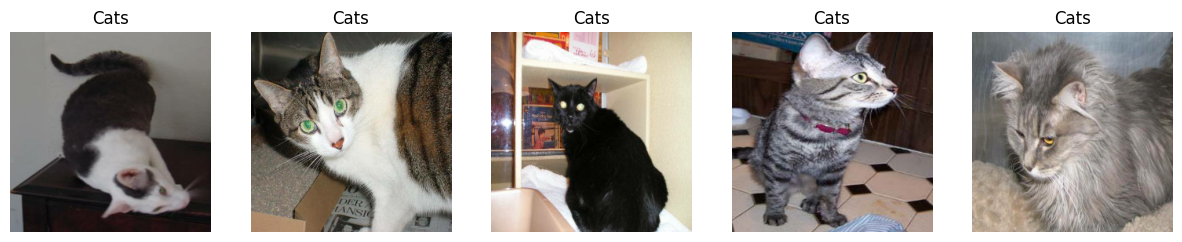

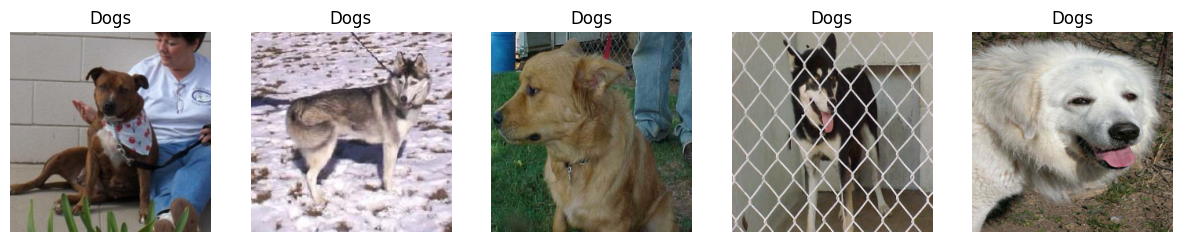

In [ ]:
class_names = ['Cats', 'Dogs']

# Visualizing 5 different images per class from the training dataset
for images, labels in train_ds.take(1):  # taking only one batch
    for i in range(len(class_names)):
        class_indices = np.where(labels == i)[0] # checking for individual classes
        selected_indices = class_indices[:5]  # Select the first 5 images per class
        #Visualizing the data
        plt.figure(figsize=(15, 10))
        for j, idx in enumerate(selected_indices):
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_names[i])
            plt.axis("off")
        plt.show()

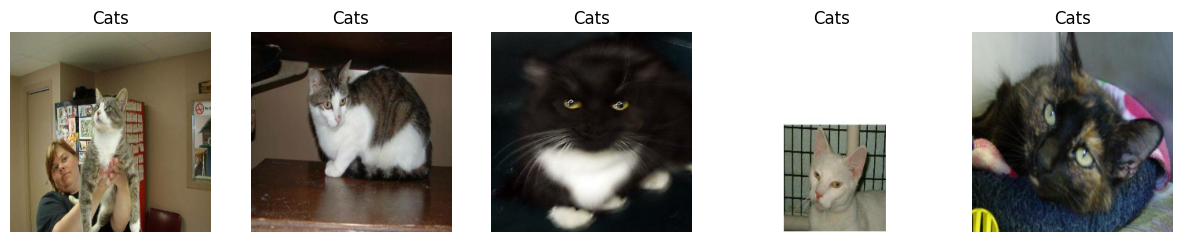

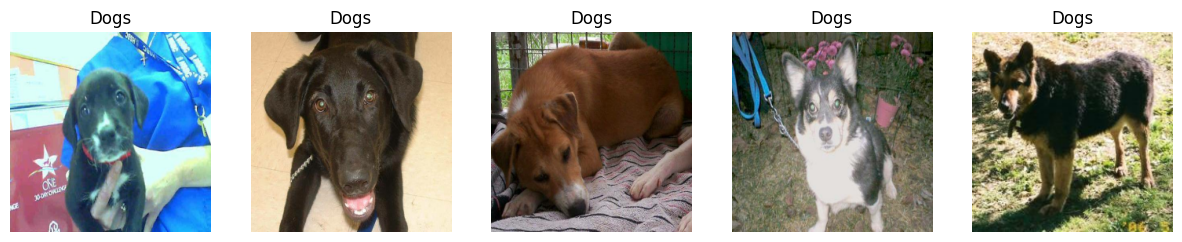

In [ ]:
# Define the categories as 'Cats' and 'Dogs'
class_categories = ['Cats', 'Dogs']

# Iterate over one batch from the validation dataset
for images, labels in validation_ds.take(1):
    # Iterate over the class indices
    for i in range(len(class_categories)):
        # Get indices of images belonging to the current category
        category_indices = np.where(labels == i)[0]
        # Select the first 5 images per category
        selected_indices = category_indices[:5]

        # Create a plot figure
        plt.figure(figsize=(15, 10))

        # Iterate over the selected indices for the current category
        for j, idx in enumerate(selected_indices):
            # Create a subplot
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_categories[i])
            plt.axis("off")

        # Show the plot
        plt.show()

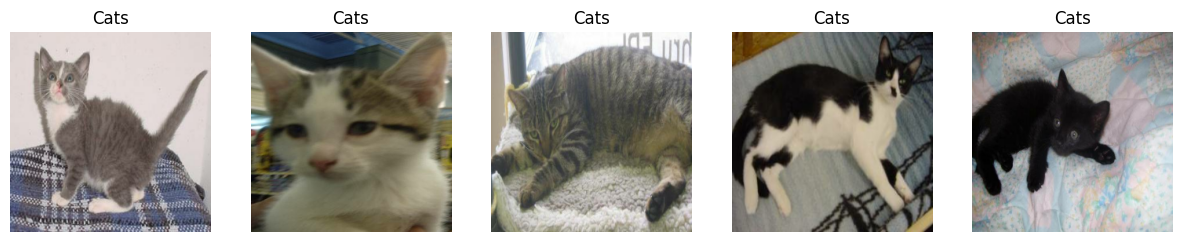

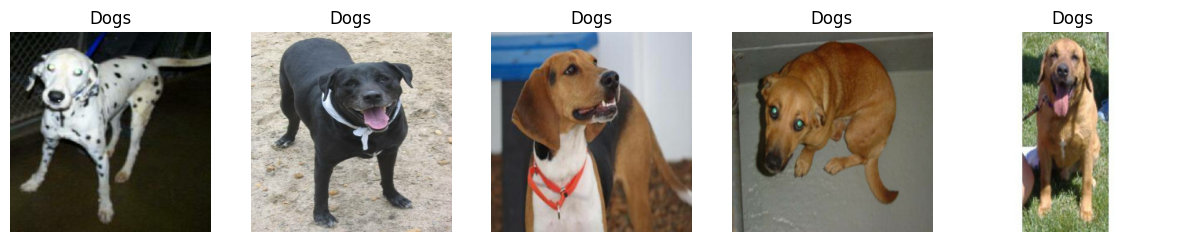

In [ ]:
# Define the categories as 'Cats' and 'Dogs'
class_categories = ['Cats', 'Dogs']

# Visualize 5 different images per category from the test dataset
for images, labels in test_ds.take(1):  # Take only one batch
    for i in range(len(class_categories)):  # Iterate over each category
        # Get indices of images belonging to the current category
        category_indices = np.where(labels == i)[0]
        # Select the first 5 images per category
        selected_indices = category_indices[:5]

        # Create a plot figure
        plt.figure(figsize=(15, 10))

        # Iterate over the selected indices for the current category
        for j, idx in enumerate(selected_indices):
            # Create a subplot
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))  # Show the image
            plt.title(class_categories[i])  # Set title as the category name
            plt.axis("off")  # Hide axis

        # Show the plot
        plt.show()


**Visually, there aren't any corrupted images**

Now, let's check it with the help of code

In [ ]:
def check_and_delete_corrupted_images(directory):
    corrupted_images = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)

        # Attempt to open the image file
        try:
            with Image.open(filepath) as img:
                img.verify()  # Attempt to open and verify the image
        except (IOError, SyntaxError) as e:
            # Handle exceptions (indicating corrupted or invalid images)
            print(f"Corrupted image: {filename} - {e}")
            corrupted_images.append(filename)
            # Delete the corrupted image
            os.remove(filepath)

    return corrupted_images

# Specify the directories for training and validation datasets
train_dogs_directory = '/content/train/dogs'
validation_dogs_directory = '/content/test/dogs'
train_cats_directory = '/content/train/cats'
validation_cats_directory = '/content/test/cats'

# Check for corrupted images in the training and validation datasets for dogs
corrupted_images_train_dogs = check_and_delete_corrupted_images(train_dogs_directory)
corrupted_images_validation_dogs = check_and_delete_corrupted_images(validation_dogs_directory)

# Check for corrupted images in the training and validation datasets for cats
corrupted_images_train_cats = check_and_delete_corrupted_images(train_cats_directory)
corrupted_images_validation_cats = check_and_delete_corrupted_images(validation_cats_directory)

# Calculate the total number of corrupted images deleted
total_corrupted_images_deleted = (len(corrupted_images_train_dogs) +
                                  len(corrupted_images_validation_dogs) +
                                  len(corrupted_images_train_cats) +
                                  len(corrupted_images_validation_cats))

print(f"Total corrupted images: {total_corrupted_images_deleted}")


Total corrupted images: 0


# Data Pre - processing:

**Did you use any augmentations or not if yes visualize one image per augmentations style you have used.?**

The accuracies for balanced models were really good even on unaugmented data which proves that augmented data weren't needed.

But, there is an example of brightness augmentation.

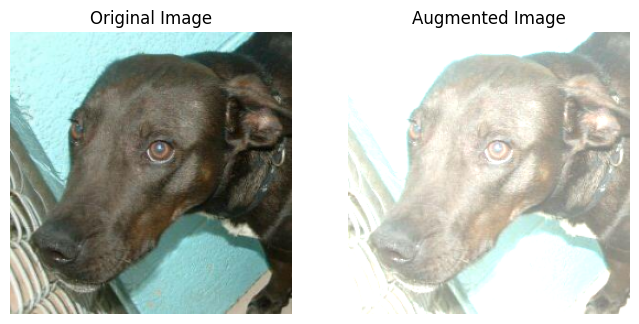

In [ ]:
# Function to apply brightness augmentation to an image
def augment_brightness(image):
    # Convert the image to float32 format
    image = tf.cast(image, tf.float32)
    # Normalize the image values to be within the [0, 1] range
    image = tf.clip_by_value(image / 255.0, 0.0, 1.0)
    # Apply random brightness augmentation with a maximum delta of 0.5
    image = tf.image.random_brightness(image, max_delta=0.5)
    # Ensure that the image values are clipped to be within the [0, 1] range
    image = tf.clip_by_value(image, 0.0, 1.0)
    # Convert the image back to uint8 format
    image = tf.cast(image * 255.0, tf.uint8)
    return image

# Selecting a single image from the dataset
for images, labels in train_ds.take(1):
    original_image = images[0]  # Select the first image
    original_label = labels[0]  # Corresponding label

# Augment the selected image
augmented_image = augment_brightness(original_image)

# Displaying the original and augmented images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image.numpy().astype("uint8"))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image.numpy().astype("uint8"))
plt.axis("off")

plt.show()


# 2.2 Task2: Building Fully Connected Neural Network[8].

Firstly, let's test using FCNN model

**FCNN**

**Normalizing the Data**

In [ ]:
# Function to normalize images and their corresponding labels
def process(image, label):
    # Convert image to float32 and normalize pixel values to [0, 1]
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Apply normalization to the training dataset
train_fc = train_ds.map(process)
# Apply normalization to the validation dataset
validation_fc = validation_ds.map(process)
# Apply normalization to the test dataset
test_fc = test_ds.map(process)

### 1. Model Building:[2]

Based on the size of your input image, design and build FCNN. You can have as many layers you
think is required for your task.
You should be able to explain your model summary.

In [ ]:
# Create a Sequential model
fcmodel = Sequential()

# Add a Flatten layer to flatten the input (assuming input images are of size 256x256 with 3 channels)
fcmodel.add(tf.keras.layers.Flatten(input_shape=(256, 256, 3)))

# Adding 14 Dense layers with ReLU activation function
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))

# Add the output layer with sigmoid activation function for binary classification
fcmodel.add(Dense(1, activation='sigmoid'))


In [ ]:
# Display a summary of the model architecture including the layers, output shape, and number of parameters
fcmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_14 (Dense)            (None, 128)               25165952  
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 128)              

The fully connected neural network (FCNN) is deep, comprising 14 dense layers with 128 units each, tailored for the binary classification task between dogs and cats. With a total of over 25 million trainable parameters, it possesses the capacity to capture intricate patterns from input data.  Regularization methods such as dropout or weight decay are advisable to mitigate overfitting and ensuring generalization. Effective model performance necessitates rigorous experimentation with different architectures and hyperparameters to strike the optimal balance between complexity and generalization for the specific task.







# Train the Model:[2]

• Once the model is built, Train your model for as many epochs you think is necessary.

Cautions: Think about the computing complexity, we suggest you to utilize the GPU of the
Google Colab.!!!

• You can use any optimizer and loss function of your choice.

• Please, Plot and show training loss/validation loss behaviour for each iterations.

The model has been trained on the training dataset for 10 epochs, using the validation dataset for validation
Also, the training history has been stored for further analysis

In [ ]:
# Compile the model with Adam optimizer, binary cross-entropy loss function,
# and accuracy as the metric to monitor during training
fcmodel.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Model has been compiled using Adam optimizer, binary cross-entropy loss function, and accuracy as the metric to monitor during training

In [ ]:
# Training the model on the training dataset for 10 epochs, using the validation dataset for validation
# Also, storing the training history for further analysis
fchistory = fcmodel.fit(train_fc, epochs=10, validation_data=validation_fc)

Epoch 1/10
313/313 [==============================] - 54s 152ms/step - loss: 0.7091 - accuracy: 0.5311 - val_loss: 0.6812 - val_accuracy: 0.5210
Epoch 2/10
313/313 [==============================] - 61s 192ms/step - loss: 0.6751 - accuracy: 0.5814 - val_loss: 0.6536 - val_accuracy: 0.6176
Epoch 3/10
313/313 [==============================] - 64s 200ms/step - loss: 0.6663 - accuracy: 0.5997 - val_loss: 0.6733 - val_accuracy: 0.5854
Epoch 4/10
313/313 [==============================] - 59s 186ms/step - loss: 0.6588 - accuracy: 0.6048 - val_loss: 0.6524 - val_accuracy: 0.6122
Epoch 5/10
313/313 [==============================] - 50s 159ms/step - loss: 0.6543 - accuracy: 0.6132 - val_loss: 0.6507 - val_accuracy: 0.6220
Epoch 6/10
313/313 [==============================] - 50s 157ms/step - loss: 0.6479 - accuracy: 0.6202 - val_loss: 0.6517 - val_accuracy: 0.6210
Epoch 7/10
313/313 [==============================] - 58s 181ms/step - loss: 0.6442 - accuracy: 0.6226 - val_loss: 0.6397 - val_ac

# Evaluate the Model:[2]

• Pick appropriate evaluation metrics to evaluate your model.

• Interpret and compare the performance on Train Set and Test Set.

**The following linegraphs along with confusion matrix and other evaluation metrics show that the model is stable but the accuracy is quite low.**

**The model seems to perform moderately well, with higher accuracy on the training data compared to the validation set, which isn't satisfactory.**

**Hence, FCNN isn't as good for the dataset**

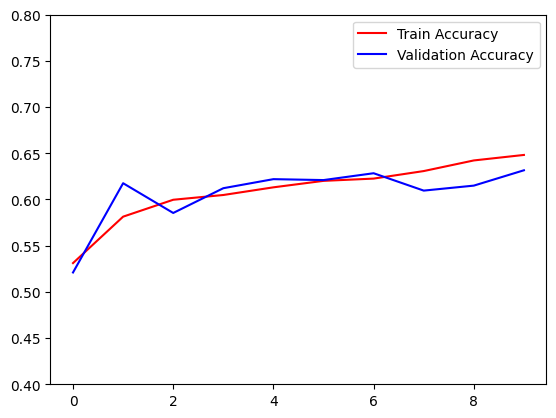

In [ ]:
# Plotting training and validation accuracy over epochs
plt.plot(fchistory.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(fchistory.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()  # Show legend
plt.ylim(0.4, 0.8)  # Set y-axis limits between 0.4 and 0.8
plt.show()

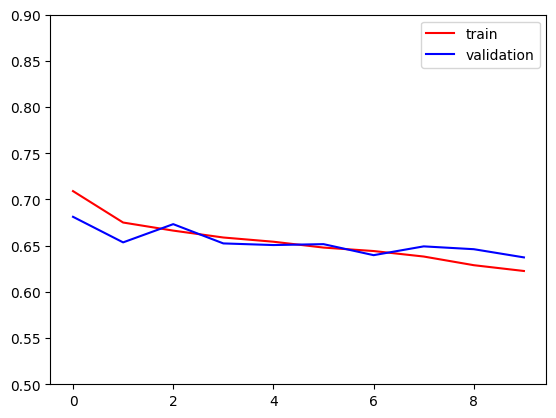

In [ ]:
#train-validation loss graph
plt.plot(fchistory.history['loss'],color='red',label='train') #x-axis
plt.plot(fchistory.history['val_loss'],color='blue',label='validation') #y-axis
plt.legend()
plt.ylim(0.5, 0.9)  # Set y-axis limits between 0 and 1
plt.show()

2/2 [==============================] - 0s 13ms/step


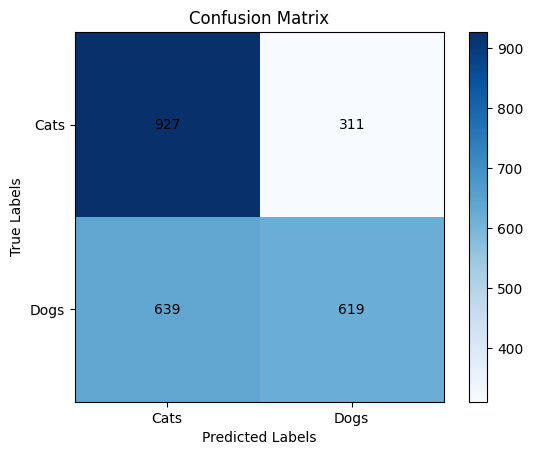

In [ ]:
# Lists are initialized to store true labels and predicted labels
true_labels = []
predicted_labels = []

# The test dataset is iterated through
for images, labels in test_fc:
    # Predictions are made
    predictions = fcmodel.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())  # Converting predictions to binary labels
    true_labels.extend(labels.numpy().astype(int))  # Converting true labels to binary labels

# Converting lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Confusion matrix is calculated
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Confusion matrix is plotted
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.yticks([0, 1], ['Cats', 'Dogs'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation scores
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6193910256410257
Precision: 0.6655913978494624
Recall: 0.49205087440381556
F1 Score: 0.5658135283363802


**All in all, the accuracy isn't good for a stable system while using FCNN**

# Prediction:[2]

**In this step we expect you to make an inference on the unseen data.**

1/1 [==============================] - 0s 124ms/step


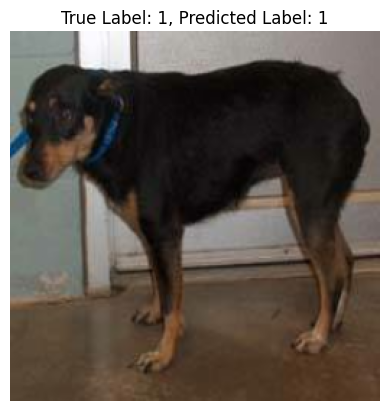

Our model predicts it to be a dog


In [ ]:
# Obtain a random batch of images and labels from the validation dataset
for images, labels in train_fc.take(1):
    # Select a random index to choose an image
    random_index = np.random.randint(len(images))
    # Extract a random validation image and its true label
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# Here, we assume the model's input shape is (batch_size, height, width, channels)
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions using the model
prediction = fcmodel.predict(random_validation_image)

# Determine the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Display the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()

# Determine the predicted class and print the result
if predicted_label == 0:
    pred_class = 'cat'
else:
    pred_class = 'dog'

print("Our model predicts it to be a", pred_class)


1/1 [==============================] - 0s 30ms/step


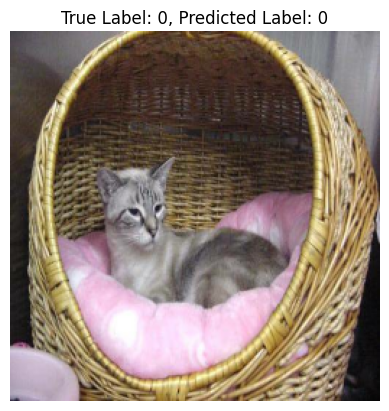

Our model predicts it to be a cat


In [ ]:
# Obtain a random batch of images and labels from the validation dataset
for images, labels in test_fc.take(1):
    # Select a random index to choose an image
    random_index = np.random.randint(len(images))
    # Extract a random validation image and its true label
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# Ensure the image dimensions match the model's input shape
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Use the model to make predictions
prediction = fcmodel.predict(random_validation_image)

# Determine the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Display the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assume grayscale image
plt.axis('off')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()

# Determine the predicted class and print the result
if predicted_label == 0:
    pred_class = 'cat'
else:
    pred_class = 'dog'

print("Our model predicts it to be a", pred_class)

These are the predictions but they aren't quite sound as not always do they come as expected just like how the confusion matrix says.

In [ ]:
# Initializing counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterating through the validation dataset
for images, labels in validation_fc:
    # Making predictions for the batch
    predictions = fcmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

    # Comparing true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()  # Converting to scalar
        if true_label == predicted_label:
            correct_predictions += 1  # Incrementing correct prediction count
        else:
            incorrect_predictions += 1  # Incrementing incorrect prediction count

# Displaying the counts of correct and incorrect predictions
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 34ms/step
Number of images with correct predictions: 3158
Number of images with incorrect predictions: 1842


In [ ]:
# Initializing counters for tracking correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Looping through the training dataset
for images, labels in train_fc:
    # Predicting labels for the batch of images
    predictions = fcmodel.predict(images)
    # Converting predicted probabilities to binary labels
    predicted_labels = (predictions > 0.5).astype(int)

    # Comparing true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()  # Convert tensor to scalar
        # Incrementing counts based on prediction accuracy
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Displaying the total counts of correct and incorrect predictions
print("Number of correct predictions:", correct_predictions)
print("Number of incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 34ms/step
Number of correct predictions: 13023
Number of incorrect predictions: 6977


In [ ]:
# Variables Initialization
correct_predictions = 0
incorrect_predictions = 0

# Validation dataset iteration
for images, labels in test_fc:
    # Prediction via fcmodel
    predictions = fcmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # True labels VS predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        # Incrementation on the basis of prediction accuracy
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Printing the counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


2/2 [==============================] - 0s 15ms/step
Number of images with correct predictions: 1569
Number of images with incorrect predictions: 927


This shows that for all three datasets the system is working really badly.

In [ ]:
# Saving the fully connected model in the runtime
fcmodel.save('/content/fcmodel')

# 2.3 Task3: Building Convolutional Neural Network[12].

Firstly, let's test using CNN model

**CNN**

# Normalization

In [ ]:
# Normalizing function
def process(image, label):
    # Converting image to float32 and normalize
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Applying normalization to train, validation, and test datasets
train_cnn = train_ds.map(process)
validation_cnn = validation_ds.map(process)
test_cnn = test_ds.map(process)

# Model Building:[3]

**Based on the size of your input image, design and build FCNN. You can have as many layers you
think is required for your task.**
**You should be able to explain your model summary.**

In [ ]:
# A CNN model is created
model = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function, and L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3),
                 kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))  # Max pooling layer

# Convolutional layer with 64 filters, kernel size of 3x3, ReLU activation function, and L2 regularization
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))  # Max pooling layer

# Convolutional layer with 128 filters, kernel size of 3x3, ReLU activation function, and L2 regularization
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))  # Max pooling layer

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Fully connected layer with 128 neurons, ReLU activation function, dropout regularization, and L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))  # Dropout layer to prevent overfitting
# Fully connected layer with 64 neurons, ReLU activation function, dropout regularization, and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))  # Dropout layer to prevent overfitting
# Output layer with 1 neuron and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Display a summary of the CNN model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

This model can be summarized as a Convolutional Neural Network (CNN) architecture for image classification. It consists of three convolutional layers with increasing filter sizes (32, 64, and 128), each followed by batch normalization and max-pooling. Then, there are two fully connected layers with 128 and 64 neurons, respectively, each followed by dropout regularization to prevent overfitting. Finally, there's an output layer with a single neuron and a sigmoid activation function for binary classification. The model incorporates ReLU activation, L2 regularization, and dropout layers to enhance learning and generalization capabilities while mitigating overfitting.







Compiling the CNN model with the Adam optimizer, binary cross-entropy loss, and accuracy metric


In [ ]:
# Compile the CNN model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The model has been trained on the training dataset for 15 epochs, using the validation dataset for validation
Also, the training history has been stored for further analysis

In [ ]:
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)

In [ ]:
# Training the CNN model for 15 epochs using the training data and validate it using the validation data. Store the training history in the variable "history".
history = model.fit(train_cnn,epochs=15,validation_data=validation_cnn)

Epoch 1/15
313/313 [==============================] - 90s 252ms/step - loss: 5.4434 - accuracy: 0.5994 - val_loss: 2.9813 - val_accuracy: 0.5004
Epoch 2/15
313/313 [==============================] - 65s 205ms/step - loss: 1.8844 - accuracy: 0.6911 - val_loss: 1.5339 - val_accuracy: 0.6562
Epoch 3/15
313/313 [==============================] - 67s 213ms/step - loss: 1.3720 - accuracy: 0.7410 - val_loss: 1.2602 - val_accuracy: 0.7780
Epoch 4/15
313/313 [==============================] - 68s 216ms/step - loss: 1.2199 - accuracy: 0.7691 - val_loss: 1.0396 - val_accuracy: 0.7724
Epoch 5/15
313/313 [==============================] - 68s 214ms/step - loss: 1.0382 - accuracy: 0.7832 - val_loss: 1.0348 - val_accuracy: 0.7564
Epoch 6/15
313/313 [==============================] - 66s 209ms/step - loss: 1.0185 - accuracy: 0.7920 - val_loss: 1.0499 - val_accuracy: 0.7516
Epoch 7/15
313/313 [==============================] - 68s 217ms/step - loss: 0.9220 - accuracy: 0.8040 - val_loss: 1.3149 - val_ac

Overall, the model seems to perform well, with higher accuracy on both the training and validation datasets. Indeed, it's better to perform binary classification using CNN.

# Evaluate the Model:[3]

• Pick appropriate evaluation metrics to evaluate your model.

• Interpret and compare the performance on Train Set and Test Set.

The below given lineplots, confusion matrix and evaluations metrics show that the accuracy is higher for a stable CNN model compared to FCNN model

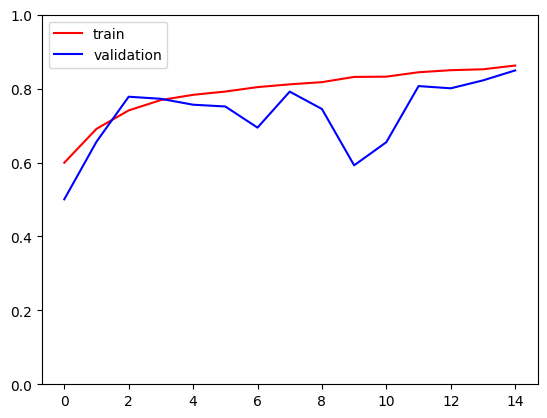

In [ ]:
# Plotting the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], color='red', label='train')  # Training accuracy in red
plt.plot(history.history['val_accuracy'], color='blue', label='validation')  # Validation accuracy in blue
plt.legend()  # Displaying legend
plt.ylim(0, 1)  # Setting y-axis limits between 0 and 1
plt.show()  # Showing the plot

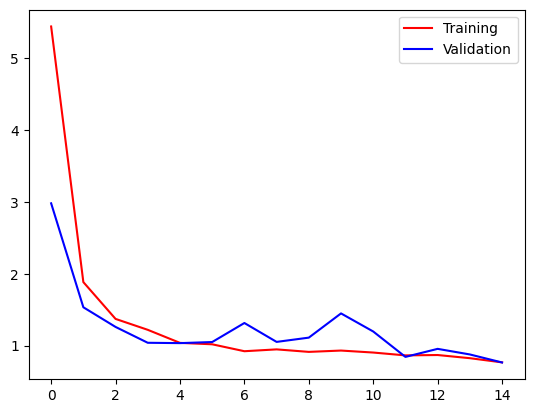

In [ ]:
# The training and validation loss over epochs are plotted
plt.plot(history.history['loss'], color='red', label='Training')  # The training loss is displayed in red
plt.plot(history.history['val_loss'], color='blue', label='Validation')  # The validation loss is represented in blue
plt.legend()  # A legend is added for clarity
plt.show()  # The plot is displayed

2/2 [==============================] - 0s 32ms/step


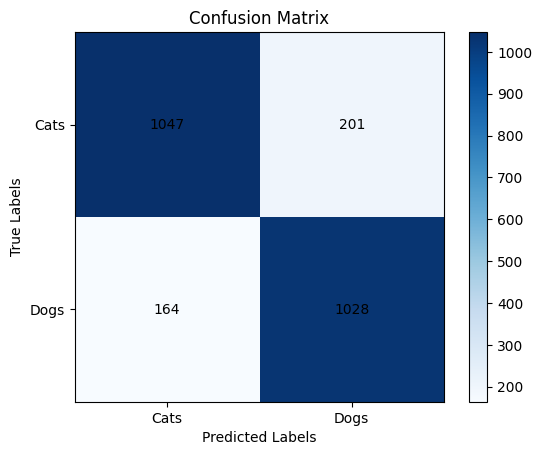

In [ ]:
# Confusion Matrix: Calculating and displaying thye true and false positives

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_cnn:
    # Make predictions
    predictions = model.predict(images)
    # Convert predictions to binary labels and extend to the predicted labels list
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())
    # Convert true labels to binary labels and extend to the true labels list
    true_labels.extend(labels.numpy().astype(int))

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.yticks([0, 1], ['Cats', 'Dogs'])
# Add text annotations for each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation scores
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8504098360655737
Precision: 0.8364524003254679
Recall: 0.8624161073825504
F1 Score: 0.849235852953325


All in all, it's better off using CNN compared to FCNN for this task

# Prediction [3]:

**In this step we expect you to make an inference on the unseen data.**

Predictions have been done on unseen data of train and test data.

To add up, all the correct and incorrect predictions for all three datasets have been calculated.

1/1 [==============================] - 0s 440ms/step


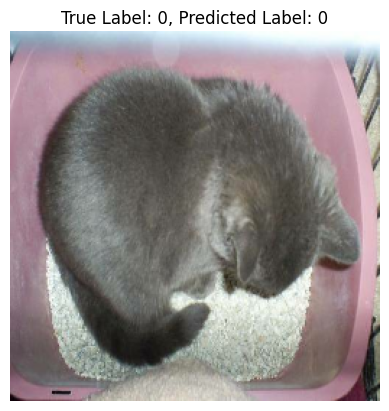

Our model predicts it to be a cat


In [ ]:
# Obtain a random batch of images and labels from the validation dataset
for images, labels in train_cnn.take(1):
    # Select a random index to choose an image
    random_index = np.random.randint(len(images))
    # Extract a random validation image and its true label
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# Here, we assume the model's input shape is (batch_size, height, width, channels)
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions using the model
prediction = model.predict(random_validation_image)

# Determine the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Display the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()

# Determine the predicted class and print the result
if predicted_label == 0:
    pred_class = 'cat'
else:
    pred_class = 'dog'

print("Our model predicts it to be a", pred_class)


1/1 [==============================] - 0s 42ms/step


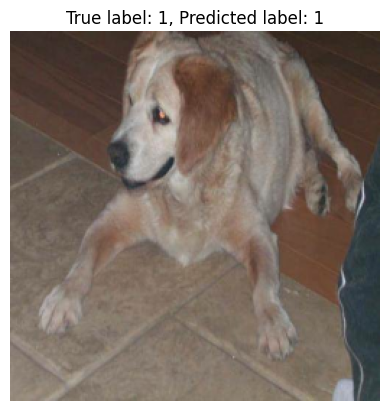

It is predicted as dog by our model.


In [ ]:
# A random batch of images and labels is obtained from the validation dataset
for images, labels in test_cnn.take(1):
    # A random index is selected to choose an image
    random_index = np.random.randint(len(images))
    # A random validation image and its true label are extracted
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# The image is reshaped to fit the model input shape
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Predictions are made
prediction = model.predict(random_validation_image)

# The predicted class (assuming binary classification) is determined
predicted_label = 1 if prediction > 0.5 else 0

# The image is displayed
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

# The predicted class is determined and the result is printed
if (predicted_label == 0):
    pred = 'cat'
else:
    pred = 'dog'

print("It is predicted as", pred, "by our model.")


In [ ]:
# Initializing counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterating through the validation dataset to evaluate model performance
for images, labels in validation_cnn:
    # Making predictions using the model
    predictions = model.predict(images)
    # Converting predicted probabilities to binary labels
    predicted_labels = (predictions > 0.5).astype(int)

    # Comparing true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()  # Converting true label to integer
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Displaying the counts of correct and incorrect predictions
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 23ms/step
Number of images with correct predictions: 4246
Number of images with incorrect predictions: 754


In [ ]:
# Initializing variables to count correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Looping through the training dataset
for images, labels in train_cnn:
    # Making predictions
    predictions = model.predict(images)
    # Converting predictions to binary labels
    predicted_labels = (predictions > 0.5).astype(int)

    # Comparing true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()  # Converting true label to integer
        # Updating counts based on prediction correctness
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Displaying the counts of correct and incorrect predictions
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 32ms/step
Number of images with correct predictions: 17461
Number of images with incorrect predictions: 2539


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in test_cnn:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


2/2 [==============================] - 0s 29ms/step
Number of images with correct predictions: 2122
Number of images with incorrect predictions: 374


In [ ]:
# Saving the Model: Save the trained model to the specified /content/cnnmodel in the runtime.
model.save('/content/cnnmodel')

# 2.4 Task4: Transfer Learning.[12]

What is Transfer Learning? ::

In many real world deep learning applications, we utilize a pre-trained model weights achieved
by training the models on a similar or related datasets. Many of these models can be loaded
from KERAS (e.g. Inception, ResNet, VGG etc.), which are trained with IMAGENET
datasets.
You can load a pre-trained model that suits your needs, modify its structure to fit your
image classification task, and either freeze or fine-tune the model. Finally, you can use the
trained model to perform image classification on the target dataset.

Data have been visualized

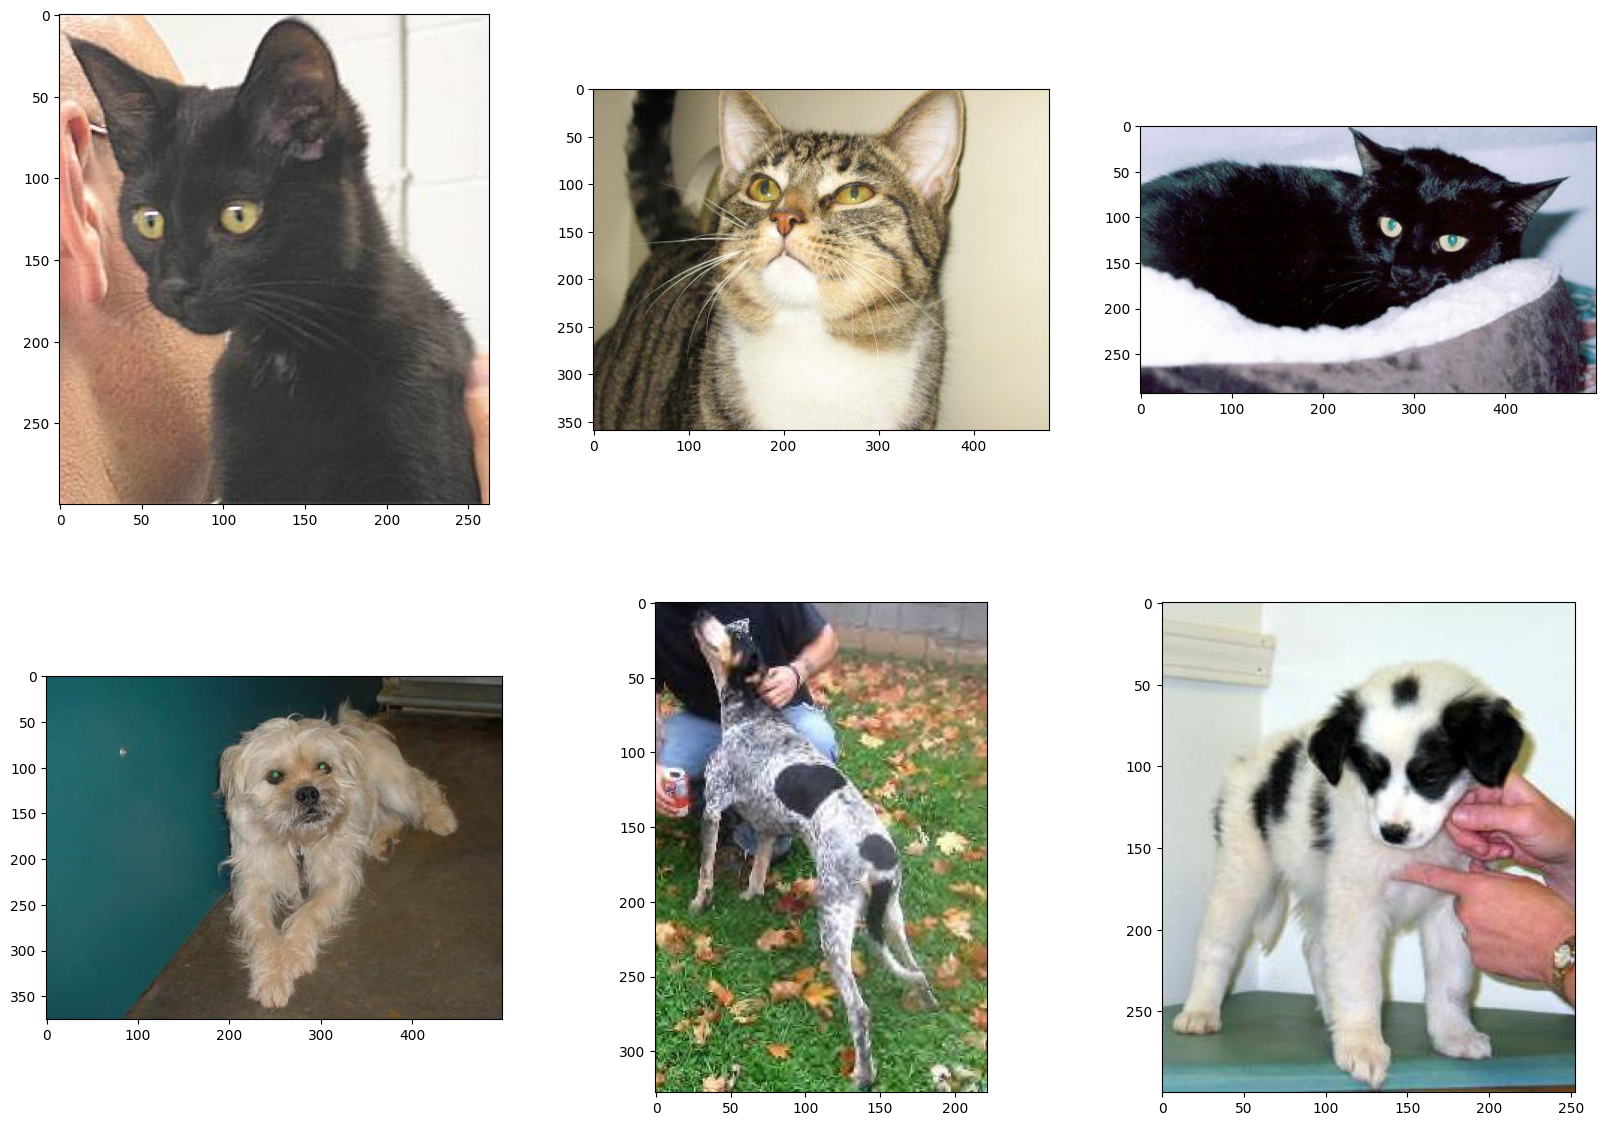

In [ ]:
image_directory = '/content/train/cats'  # Directory containing cat images
image_directory2 = '/content/train/dogs'  # Directory containing dog images
image_files = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]  # List of file paths for cat images
image_files2 = [os.path.join(image_directory2,filename) for filename in os.listdir(image_directory2)]  # List of file paths for dog images
num_samples = 3  # Number of images to display
selected_images = random.sample(image_files, num_samples)  # Randomly select 'num_samples' cat images
selected_images2 = random.sample(image_files2,num_samples)  # Randomly select 'num_samples' dog images

# Create subplots for displaying images
fig, axes = plt.subplots(2, num_samples, figsize=(20,14))

# Display each selected cat image
for i, image_path in enumerate(selected_images):
    ax = axes[0,i]  # Get the current axis for cat images
    img = mpimg.imread(image_path)  # Read the image
    ax.imshow(img)  # Display the image
    ax.axis()  # Set axis parameters

# Display each selected dog image
for i, image_path in enumerate(selected_images2):
    ax = axes[1,i]  # Get the current axis for dog images
    img = mpimg.imread(image_path)  # Read the image
    ax.imshow(img)  # Display the image
    ax.axis()  # Set axis parameters

# Show the images
plt.show()


#1. Select and Load a Pre - trained Model [3]**

Choose a pre-trained image classification model, such as VGG or ResNet.

Using a deep learning library, such as TensorFlow or Keras you can load the pre-trained model
weights.

In order to fine-tune, VGG model has been used.

In [ ]:
# Instantiate VGG16 Convolutional Base: Instantiating the VGG16 convolutional base

conv_base = VGG16(
    weights='imagenet',  # Pre-trained weights from ImageNet
    include_top=False,   # Exclude the densely connected layers
    input_shape=(256, 256, 3)  # Specify the input shape as (256, 256, 3)
)


# Plotting the VGG Model

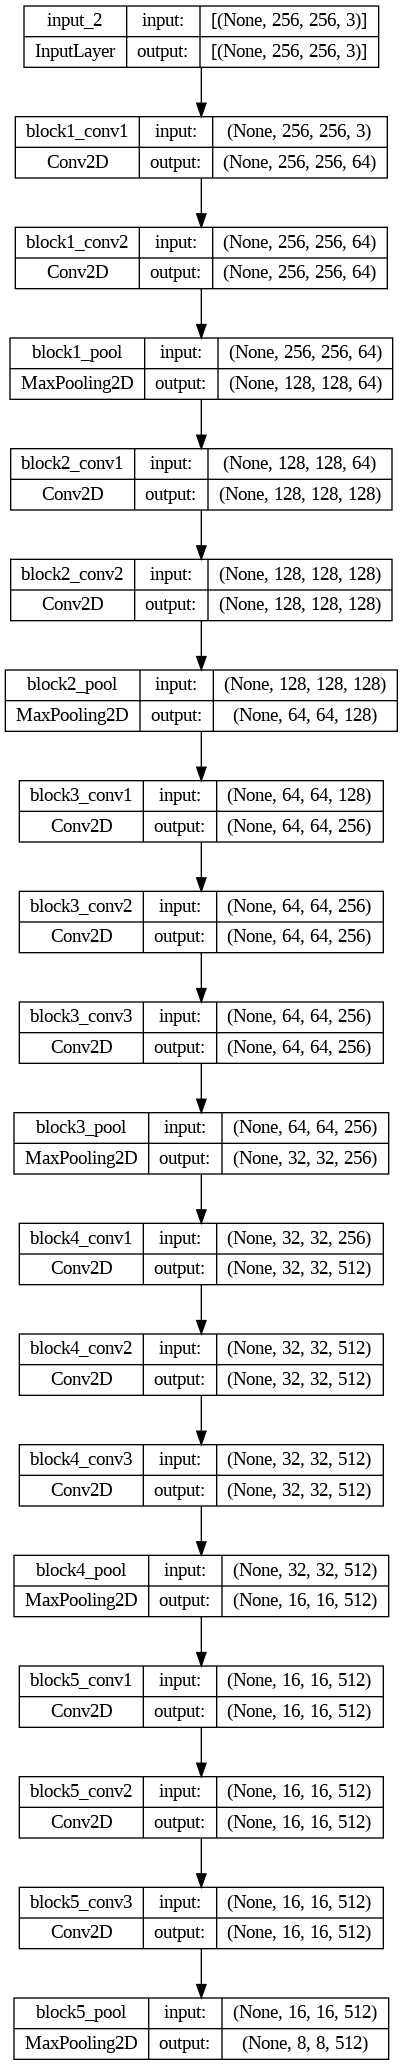

In [ ]:
# Plot the architecture of the convolutional base with shapes of the layers shown.
plot_model(conv_base, show_shapes=True)


Now, let's find the trainable status

In [ ]:
# Set the entire convolutional base to be trainable.
conv_base.trainable = True

# Initialize a flag variable to control whether layers should be set as trainable.
set_trainable = False

# Iterate through each layer in the convolutional base.
for layer in conv_base.layers:
    # If the layer's name is 'block5_conv1', set the flag to True.
    if layer.name == 'block5_conv1':
        set_trainable = True
    # If the flag is True, set the layer as trainable; otherwise, set it as not trainable.
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Iterate through each layer in the convolutional base and print its name along with its trainable status.
for layer in conv_base.layers:
    print(layer.name, layer.trainable)


input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Now, the summary of conv_base  VGG model has been found out

In [ ]:
# Display a summary of the convolutional base, showing the architecture and parameter details.
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# Restructure the model [3]
With addition or removal of some layers to fit the requirements of your specific image classification
task.

- Dense layer has been added as input and output layers containing relu and sigmoid activation function respectively.

In [ ]:
# Create Transfer Learning Model: Define a Sequential model and add layers.

tfmodel = Sequential()

# Add VGG16 Convolutional Base: Add the VGG16 convolutional base pretrained on ImageNet to the model.
tfmodel.add(conv_base)

# Flatten Layer: Flatten the output of the convolutional base to feed into the fully connected layers.
tfmodel.add(Flatten())

# Fully Connected Layers: Add fully connected layers with ReLU activation.
tfmodel.add(Dense(256, activation='relu'))  # Dense layer with 256 units and ReLU activation
tfmodel.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification


In [ ]:
# Normalize Images: Define a function to normalize images by casting pixel values to float32 and scaling them to the range [0, 1].

def process(image, label):
    image = tf.cast(image / 255., tf.float32)  # Cast pixel values to float32 and scale to [0, 1]
    return image, label

# Apply Normalization: Map the normalization function to the training, validation, and test datasets.

train_data = train_ds.map(process)  # Apply normalization to the training dataset
validation_data = validation_ds.map(process)  # Apply normalization to the validation dataset
test_data = test_ds.map(process)  # Apply normalization to the test dataset


In [ ]:
tfmodel.summary() # Model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 15468545 (59.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


The architecture leverages the powerful feature extraction capabilities of VGG16 while allowing for dogs vs cats task customization through the additional dense layers. The non-trainable parameters from VGG16 provide a strong foundation for feature extraction, while the trainable parameters in the dense layers enable task-specific learning. Overall, this model is well-suited for tasks such as ours, where transfer learning from pre-trained models can significantly improve performance.

# Train the Model {Fine Tuning} [3]

Compiling the CNN model with the customer optimizer with learning rate(learning_rate=1e-5), binary cross-entropy loss, and accuracy metrics.

5 epochs have been used to train the data.


In [ ]:
# Compiling Transfer Learning Model: Configure the model for training.

tfmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # Set RMSprop optimizer with a learning rate of 1e-5
    loss='binary_crossentropy',  # Use binary crossentropy loss function for binary classification
    metrics=['accuracy']  # Track accuracy metric during training
)


In [ ]:
# Train Transfer Learning Model: Fit the model to the training data.

history_tf = tfmodel.fit(
    train_data,  # Training data
    epochs=5,  # Number of epochs
    validation_data=validation_data  # Validation data
)


Epoch 1/5
313/313 [==============================] - 147s 460ms/step - loss: 0.2286 - accuracy: 0.9011 - val_loss: 0.1491 - val_accuracy: 0.9400
Epoch 2/5
313/313 [==============================] - 162s 516ms/step - loss: 0.1023 - accuracy: 0.9593 - val_loss: 0.1213 - val_accuracy: 0.9476
Epoch 3/5
313/313 [==============================] - 149s 474ms/step - loss: 0.0695 - accuracy: 0.9737 - val_loss: 0.0983 - val_accuracy: 0.9626
Epoch 4/5
313/313 [==============================] - 162s 514ms/step - loss: 0.0472 - accuracy: 0.9829 - val_loss: 0.1503 - val_accuracy: 0.9378
Epoch 5/5
313/313 [==============================] - 149s 473ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0700 - val_accuracy: 0.9712


# Evaluate the model [3]

All the evaluation metrics and predictions show that this model is the best of the lot as the accuracies for all data are in higher ninties

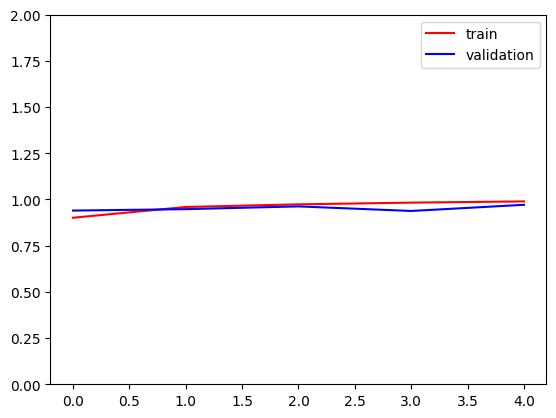

In [ ]:
# Plotting training and validation accuracy

plt.plot(history_tf.history['accuracy'], color='red', label='train')
plt.plot(history_tf.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()


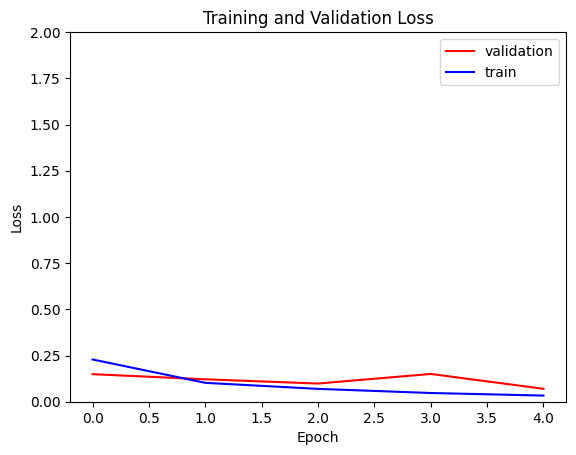

In [ ]:
# Visualizing training and validation loss

plt.plot(history_tf.history['val_loss'], color='red', label='validation')
plt.plot(history_tf.history['loss'], color='blue', label='train')
plt.legend()
plt.ylim(0, 2)  # Adjust y-axis limit if needed
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


2/2 [==============================] - 0s 167ms/step


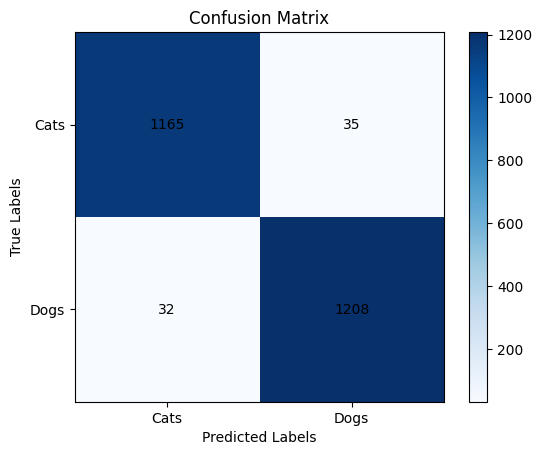

In [ ]:

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())  # Convert predictions to binary labels
    true_labels.extend(labels.numpy().astype(int))  # Convert true labels to binary labels

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.yticks([0, 1], ['Cats', 'Dogs'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation scores
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9725409836065574
Precision: 0.9718423169750603
Recall: 0.9741935483870968
F1 Score: 0.9730165122835279


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in validation_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 31ms/step
Number of images with correct predictions: 4856
Number of images with incorrect predictions: 144


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in train_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 30ms/step
Number of images with correct predictions: 19950
Number of images with incorrect predictions: 50


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in test_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

2/2 [==============================] - 0s 160ms/step
Number of images with correct predictions: 2371
Number of images with incorrect predictions: 69


1/1 [==============================] - 1s 895ms/step


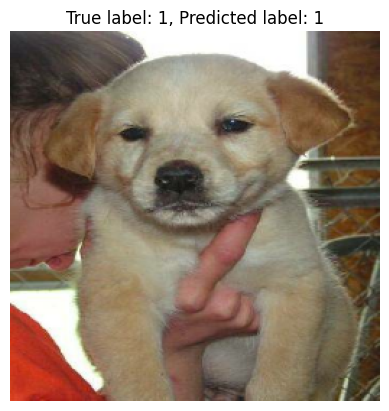

Our model says it is a  dog


In [ ]:
# Get a random batch of images and labels from the test dataset
for images, labels in test_data.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = tfmodel.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

# Determine and print the predicted class
if predicted_label == 0:
    pred_class = 'cat'
else:
    pred_class = 'dog'

print("Our model predicts it to be a", pred_class)


All in all, this is the best model.

In [ ]:
tfmodel.save('/content/tlmodel') # Saving the model in runtime

# 2.5 Task5: Final Discussion.[3]

In this step we want you to perform comparative evaluation between:

• Image Classification with Fully Connected Neural Network.

• Image Classification with Convolutional Neural Network.

• Image Classification with Transfer learning and fine - tuning.

Which gave you the best result? and Why do you think that happen?

# ROC AUC CURVE

2/2 [==============================] - 0s 179ms/step


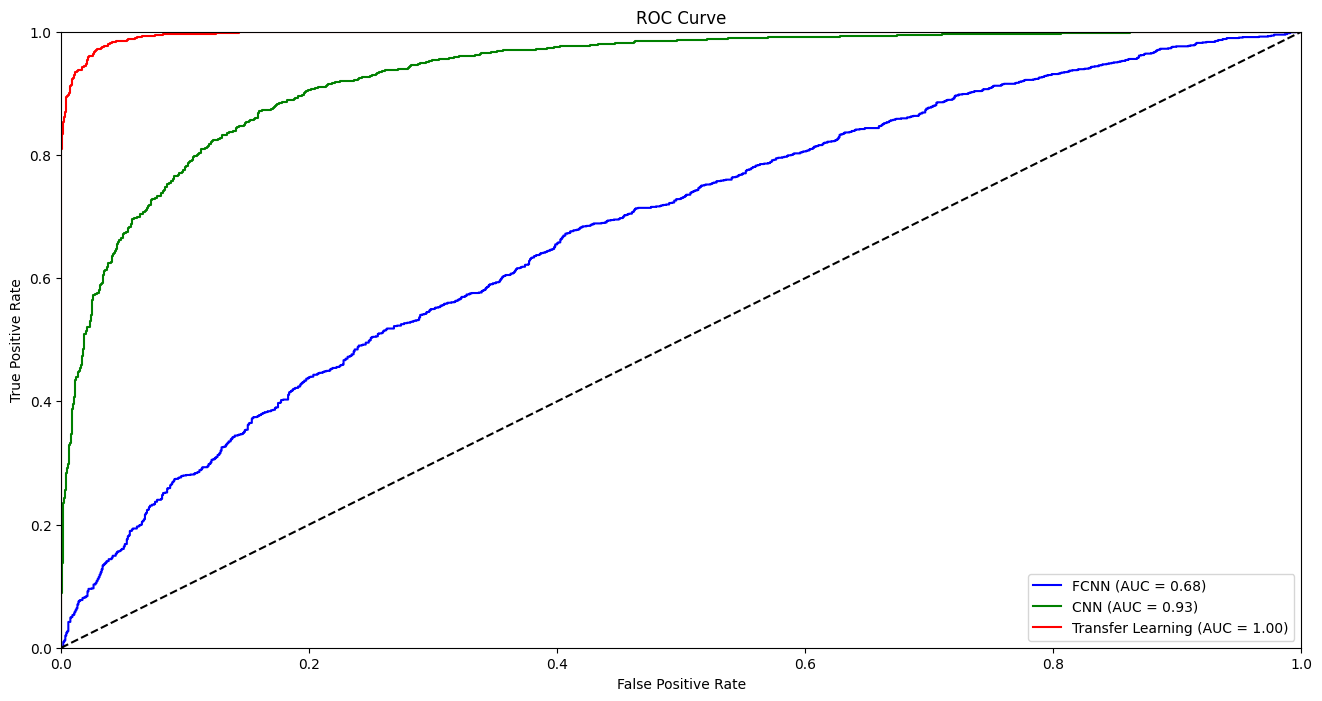

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities for each model
true_labels = []
true_labels1 = []
true_labels2 = []

predicted_probabilities = []
predicted_probabilities1 = []
predicted_probabilities2 = []

# Iterate through the test dataset for the first model (test_fc)
for images, labels in test_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    true_labels.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities.extend(predictions.flatten())  # Flatten predictions and extend the list

# Iterate through the test dataset for the second model (test_cnn)
for images, labels in test_cnn:
    # Make predictions
    predictions1 = model.predict(images)
    true_labels1.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities1.extend(predictions1.flatten())  # Flatten predictions and extend the list

# Iterate through the test dataset for the third model (test_data)
for images, labels in test_data:
    # Make predictions
    predictions2 = tfmodel.predict(images)
    true_labels2.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities2.extend(predictions2.flatten())  # Flatten predictions and extend the list

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
true_labels1 = np.array(true_labels1)
true_labels2 = np.array(true_labels2)

predicted_probabilities = np.array(predicted_probabilities)
predicted_probabilities1 = np.array(predicted_probabilities1)
predicted_probabilities2 = np.array(predicted_probabilities2)

# Calculate the false positive rate, true positive rate, and thresholds for each model
fpr_fc, tpr_fc, _ = roc_curve(true_labels, predicted_probabilities)
fpr_cnn, tpr_cnn, _ = roc_curve(true_labels1, predicted_probabilities1)
fpr_tf, tpr_tf, _ = roc_curve(true_labels2, predicted_probabilities2)

# Calculate the AUC score for each model
auc_fc = auc(fpr_fc, tpr_fc)
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_tf = auc(fpr_tf, tpr_tf)

# Create a new figure with a size of 16 by 8 inches
plt.figure(figsize=(16, 8))

# Plot the ROC curve for each model
plt.plot(fpr_fc, tpr_fc, 'b', label=f'FCNN (AUC = {auc_fc:.2f})')
plt.plot(fpr_cnn, tpr_cnn, 'g', label=f'CNN (AUC = {auc_cnn:.2f})')
plt.plot(fpr_tf, tpr_tf, 'r', label=f'Transfer Learning (AUC = {auc_tf:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Set the x and y limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# Set the axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Add a title
plt.title('ROC Curve')

# Add a legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


In this scenario, the Transfer Learning approach with fine-tuning yielded the best result, achieving an AUC score of 1. The Convolutional Neural Network (CNN) also performed significantly better than the Fully Connected Neural Network (FCNN), with an AUC score of 0.93 compared to FCNN's 0.68.



This proves that for this task, Transfer Learning is the best compared to CNN and FCNN

In [ ]:
# Ways to reduce overfitting

# Adding more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity